In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Given a training set $\mathcal{D}$ of $m\ n$-dimensional training examples $(\mathbf{x}_i, y_i)$, the **Perceptron Learning Algorithm** (PLA) tries to find a hypothesis function $h$ that predicts the label $y_i$ of every $\mathbf{x}_i$ correctly.

The hypothesis function of the Perceptron is $h(\mathbf{x}) = \mathrm{sign}(\mathbf{x} \cdot \mathbf{b})$. The set $\mathcal{H}$ of hypothesis functions is the set of $n-1$ dimensional hyperplanes.

In [2]:
def hypothesis(x, w):
    return np.sign(np.dot(x, w))

In [3]:
def predict(hypothesis_function, X, y, w):
    predictions = np.apply_along_axis(hypothesis_function, 1, X, w)
    misclassified = X[y != predictions]
    return misclassified

In [4]:
def pick_one_from(misclassified_examples, X, y):
    np.random.shuffle(misclassified_examples)
    x = misclassified_examples[0]
    index = np.where(np.all(X == x, axis=1))
    return x, y[index]

In [5]:
def update_rule(expected_y, w, x):
    if expected_y == 1:
        w = w + x
    else: 
        w = w - x
    return w

In [6]:
def perceptron_learning_algorithm(X, y):
    w = np.random.rand(3)
    w[2] = -1
    correct = []
    misclassified_examples = predict(hypothesis, X, y, w)
    while misclassified_examples.any():
        if len(correct) > 1000:
            raise('Data is not linearly seperable in 1000 steps.')
        x, expected_y = pick_one_from(misclassified_examples, X, y)
        w = update_rule(expected_y, w, x)
        misclassified_examples = predict(hypothesis, X, y, w)
        correct.append(len(misclassified_examples))
    return w, correct

To convert the hyperplane back to a point-slope form line, let $\mathbf{w} = (w_0, w_1, w_2)^T$, and $\mathbf{x} = (1, x, y)^T$, then:

$$ (w_0, w_1, w_2) \cdot (1, x, y)^T = 0 \\
 w_0 + w_1x + w_2y = 0 \\
 w_2y = -w_1x - w_0 \\
 \tag{1} y = -\frac{w_1}{w_2}x-\frac{w_0}{w_2}.$$

In [7]:
color = lambda X: ['b' if x == 1 else 'r' for x in X]
get_y = lambda x, w: (-w[1]/w[2]) * x - w[0] / w[2] # Eq (1)

In [8]:
get_b = lambda w, x, b: min(abs(dot(x, w) + b)) # Eq. (2)

Text(0, 0.5, 'Misclassified')

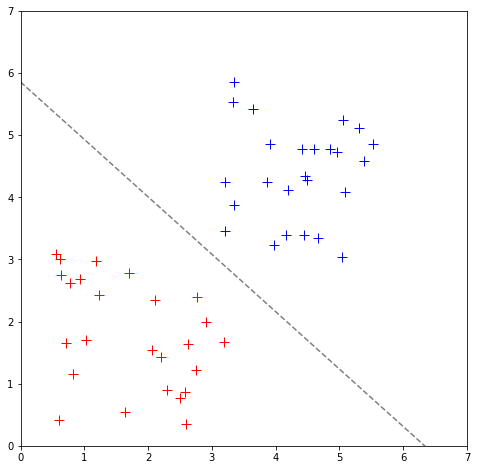

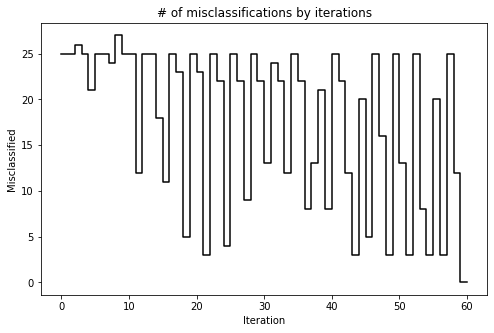

In [13]:
# generate some data
N = 25
a = [list(np.random.rand(2)*3 + 0.25) for _ in range(N)]
b = [list(np.random.rand(2)*3 + 3) for _ in range(N)]
X = np.array(a + b)
y = np.array([-1] * N + [1] * N)

# to augmented form
X_augmented = np.c_[np.ones(X.shape[0]), X]

# calculate w
w, misclassifed_count = perceptron_learning_algorithm(X_augmented, y)

# plot the data and hyperplane
plt.figure(figsize=(8,8))
ax = plt.gca()
lim = [0, 7]
ax.set_xlim(lim)
ax.set_ylim(lim)
lx = np.array(ax.get_xlim())
ly = get_y(lx, w)

scatter(X[:,0], X[:,1], c=color(y), marker='+', lw=1, s=100)
plot(lx, ly, ls='dashed', c='gray')

# plot the iterations vs. misclassifications
plt.figure(figsize=(8,5))
step(range(len(misclassifed_count)), misclassifed_count, c='black')
title('# of misclassifications by iterations')
xlabel('Iteration')
ylabel('Misclassified')

**Closest point to the hyperplane:** Given a training example $(\mathbf{x},y)$ and a hyperplane defined by the vector $\mathbf{w}$, we compute $\beta = \mathbf{w}\cdot\mathbf{x}+b$ to know how far the point is from the hyperplane.

Given a data set $\mathcal{D} = \left\{(\mathbf{x}_i,y_i)\ |\ \mathbf{x}_i \in \mathbb{R}^2, y_i \in \{-1, 1\}\right\}^m_{i=1}$, we compute $\beta$ for each training example, and say the the number $B$ is the smallest absolute value of $\beta$ we encounter.

$$ B = \min\limits_{i=1...m} | \beta_i | \tag{2}$$